## Importing the libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from time import time
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

## Importing the dataset

In [37]:
dataset= pd.read_csv('dataset/census.csv')
test = pd.read_csv('dataset/test_census.csv').iloc[:,1:]
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

## Check if there any missing values 

In [38]:
dataset.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [39]:
test.isnull().sum()

age                17
workclass          22
education_level    20
education-num      14
marital-status     21
occupation         22
relationship       16
race               19
sex                19
capital-gain       15
capital-loss       17
hours-per-week     13
native-country     16
dtype: int64

## Handling Missing Values

In [40]:
print(X.shape)
print(test.shape)

(45222, 13)
(45222, 13)


In [41]:
new_X=pd.concat([X, test])
print(new_X.shape)

(90444, 13)


In [42]:
new_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90444 entries, 0 to 45221
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              90427 non-null  float64
 1   workclass        90422 non-null  object 
 2   education_level  90424 non-null  object 
 3   education-num    90430 non-null  float64
 4   marital-status   90423 non-null  object 
 5   occupation       90422 non-null  object 
 6   relationship     90428 non-null  object 
 7   race             90425 non-null  object 
 8   sex              90425 non-null  object 
 9   capital-gain     90429 non-null  float64
 10  capital-loss     90427 non-null  float64
 11  hours-per-week   90431 non-null  float64
 12  native-country   90428 non-null  object 
dtypes: float64(5), object(8)
memory usage: 9.7+ MB


In [43]:
num=new_X.select_dtypes(include=['int64','float64'])
num1=num.columns
print(num.columns)

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [44]:
cat=new_X.select_dtypes(include='object')
cat1=cat.columns
print(cat.columns)

Index(['workclass', 'education_level', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


In [45]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='median') 
imputer1.fit(new_X[num1])
new_X[num1] = imputer1.transform(new_X[num1])
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
imputer2.fit(new_X[cat1])
new_X[cat1] = imputer2.transform(new_X[cat1])

In [46]:
new_X.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

## Data Exploration

In [47]:
new_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90444 entries, 0 to 45221
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              90444 non-null  float64
 1   workclass        90444 non-null  object 
 2   education_level  90444 non-null  object 
 3   education-num    90444 non-null  float64
 4   marital-status   90444 non-null  object 
 5   occupation       90444 non-null  object 
 6   relationship     90444 non-null  object 
 7   race             90444 non-null  object 
 8   sex              90444 non-null  object 
 9   capital-gain     90444 non-null  float64
 10  capital-loss     90444 non-null  float64
 11  hours-per-week   90444 non-null  float64
 12  native-country   90444 non-null  object 
dtypes: float64(5), object(8)
memory usage: 9.7+ MB


In [48]:
new_X.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,90444.000000,90444.000000,90444.000000,90444.000000,90444.000000
mean,38.548671,10.118471,1100.324698,88.578999,40.938548
std,13.216945,2.552635,7499.182577,404.927339,12.006565
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


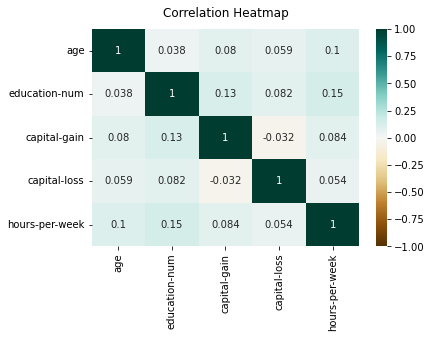

In [49]:
heatmap = sns.heatmap(new_X.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

## Scaling & encoding 

In [50]:
skewed = ['capital-gain', 'capital-loss']
# Log-transform the skewed features (create function to use later for test set)
def log_transform(data):
    return data[skewed].apply(lambda x: np.log(x + 1))
    
new_X[skewed] = log_transform(new_X)

In [51]:
new_X[skewed].describe()

,capital-gain,capital-loss
count,90444.000000,90444.000000
mean,0.740632,0.355408
std,2.466255,1.595738
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,11.512925,8.379539


In [52]:
sc = MinMaxScaler()
new_X[num1]=sc.fit_transform(new_X[num1])
new_X.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [53]:
new_X= pd.get_dummies(new_X,drop_first=True)

## Splitting the dataset into the Training set and Test set

In [54]:
y=y.replace({ "<=50K" :0 , ">50K" : 1})

In [55]:
X1=new_X.iloc[:dataset.shape[0]]
test1=new_X.iloc[dataset.shape[0]:]

In [56]:
print(X1.shape)
print(test1.shape)

(45222, 95)
(45222, 95)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)

In [58]:
model=XGBClassifier(tree_method='gpu_hist',use_rmm=True)
model.fit(X_train,y_train)

# Make predictions using the unoptimized and model
pred = model.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, pred)))
print("ROC-AUC score on testing data: {:.4f}".format(roc_auc_score(y_test, pred)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, pred, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8706
ROC-AUC score on testing data: 0.7983
F-score on testing data: 0.7502


In [59]:
model=AdaBoostClassifier()
model.fit(X_train,y_train)

# Make predictions using the unoptimized and model
pred = model.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, pred)))
print("ROC-AUC score on testing data: {:.4f}".format(roc_auc_score(y_test, pred)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, pred, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8563
ROC-AUC score on testing data: 0.7702
F-score on testing data: 0.7210


In [60]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

# Make predictions using the unoptimized and model
pred = model.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, pred)))
print("ROC-AUC score on testing data: {:.4f}".format(roc_auc_score(y_test, pred)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, pred, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8628
ROC-AUC score on testing data: 0.7781
F-score on testing data: 0.7377


In [63]:
clf=XGBClassifier(tree_method='gpu_hist',use_rmm=True)
#parameters = {'n_estimators': range(20,1021,100)}
#parameters = { 'n_estimators': range(1000,1501,100)}
#parameters = { 'n_estimators': range(2000,3001,200)}
#parameters = { 'n_estimators': range(20,101,5)}
#parameters = { 'n_estimators': [60,100,120,1000,2000]}
#parameters = { 'n_estimators': [120],'max_depth':range(2,12,1)}
#parameters = { 'n_estimators': [120],'max_depth':[5],'min_child_weight':range(0,15,1)}
#parameters = { 'n_estimators': [120],'max_depth':[5],'min_child_weight':[0],'subsample':[0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.7,0.75,0.8,0.85,0.9]}
#parameters = { 'n_estimators': [120],'max_depth':[5],'min_child_weight':[0],'subsample':[0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]}
#parameters = { 'n_estimators': [120],'max_depth':[5],'min_child_weight':[0],'subsample':[0.93],'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
#parameters = { 'n_estimators': [120],'max_depth':[5],'min_child_weight':[0],'subsample':[0.93],'learning_rate':[0.3],'gamma':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
parameters = { 'n_estimators': [120],'max_depth':[5],'min_child_weight':[0],'subsample':[0.93],'learning_rate':[0.3],'gamma':[0]}
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,n_jobs=-1,cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict_proba(X_test)[:, 1]
best_predictions = best_clf.predict_proba(X_test)[:, 1]

# Report the before-and-afterscores
print("Unoptimized model\n------")
#print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("ROC-AUC score on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
#print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
#print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final ROC-AUC score on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
#print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
ROC-AUC score on testing data: 0.9273

Optimized Model
------
Final ROC-AUC score on the testing data: 0.9280


In [64]:
best_clf.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': 0,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.3,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 0,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 0.93,
 'tree_method': 'gpu_hist',
 'validate_parameters': 1,
 'verbosity': None,
 'use_rmm': True}

## PRED ON TEST

In [72]:
model=XGBClassifier(tree_method='gpu_hist',use_rmm=True,n_estimators=120,max_depth=5,min_child_weight=0,subsample=0.93,learning_rate=0.3,gamma=0)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=0,
              missing=nan, monotone_constraints='()', n_estimators=120,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [73]:
Y_test=model.predict_proba(test1)[:, 1]


In [74]:
sub = pd.read_csv('dataset/test_census.csv')
Final = pd.DataFrame()
Final['id']=sub.iloc[:,0]
Final['income']=Y_test

In [75]:
Final.to_csv("Final_Test_Pred.csv",index=False)